<a href="https://colab.research.google.com/github/momotonton/DS_Project/blob/main/Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get update -qq
!pip install pandas_alive

In [1]:
import pandas as pd
import numpy as np
import math as e
vgames2 = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv')
df = vgames2.iloc[:,1:] # index remove


In [22]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
def yearchange(x):
  if -1 < x < 22 : 
    return x+2000
  elif 22< x <100 :
    return x+1900    
  else :
    return x

def tofloat (x):
  return float(x)

def toInt (x):
  return int(x)
  
def kchange (x) :
  if x > 50:
    return x/10000
  else :
    return x  
def f(x): 
  return x-e**-x    

In [ ]:
df_DS = df['Platform'] == 'DS'
df_DS = df[df_DS]
df_DS['Year'] = df_DS['Year'].fillna(df_DS['Year'].mean())
df_DS['Year'] = df_DS['Year'].astype(int)
DS_freq = df_DS['Genre'].value_counts(dropna=True).idxmax()
df_DS['Genre'].fillna(DS_freq, inplace = True)

df_Wii = df['Platform'] == 'Wii'
df_Wii = df[df_Wii]
df_Wii['Year'] = df_Wii['Year'].fillna(df_Wii['Year'].mean())
df_Wii['Year'] = df_Wii['Year'].astype(int)
Wii_freq = df_Wii['Genre'].value_counts(dropna=True).idxmax()
df_Wii['Genre'].fillna(Wii_freq, inplace = True)

df_PSP = df['Platform'] == 'PSP'
df_PSP = df[df_PSP]
df_PSP['Year'] = df_PSP['Year'].fillna(df_PSP['Year'].mean())
df_PSP['Year'] = df_PSP['Year'].astype(int)
PSP_freq = df_PSP['Genre'].value_counts(dropna=True).idxmax()
df_PSP['Genre'].fillna(PSP_freq, inplace = True)

df_PS2 = df['Platform'] == 'PS2'
df_PS2 = df[df_PS2]
df_PS2['Year'] = df_PS2['Year'].fillna(df_PS2['Year'].mean())
df_PS2['Year'] = df_PS2['Year'].astype(int)
PS2_freq = df_PS2['Genre'].value_counts(dropna=True).idxmax()
df_PS2['Genre'].fillna(PS2_freq, inplace = True)

df_PS3 = df['Platform'] == 'PS3'
df_PS3 = df[df_PS3]
df_PS3['Year'] = df_PS3['Year'].fillna(df_PS3['Year'].mean())
df_PS3['Year'] = df_PS3['Year'].astype(int)
PS3_freq = df_PS3['Genre'].value_counts(dropna=True).idxmax()
df_PS3['Genre'].fillna(PS3_freq, inplace = True)



df_PC = df['Platform'] == 'PC'
df_PC = df[df_PC]
df_PC['Year'] = df_PC['Year'].fillna(df_PC['Year'].mean())
df_PC['Year'] = df_PC['Year'].astype(int)
PC_freq = df_PC['Genre'].value_counts(dropna=True).idxmax()
df_PC['Genre'].fillna(PC_freq, inplace = True)


df_PS = df['Platform'] == 'PS'
df_PS = df[df_PS]
df_PS['Year'] = df_PS['Year'].fillna(df_PS['Year'].mean())
df_PS['Year'] = df_PS['Year'].astype(int)
PS_freq = df_PS['Genre'].value_counts(dropna=True).idxmax()
df_PS['Genre'].fillna(PS_freq, inplace = True)


df_X360 = df['Platform'] == 'X360'
df_X360 = df[df_X360]
df_X360['Year'] = df_X360['Year'].fillna(df_X360['Year'].mean())
df_X360['Year'] = df_X360['Year'].astype(int)
X360_freq = df_X360['Genre'].value_counts(dropna=True).idxmax()
df_X360['Genre'].fillna(X360_freq, inplace = True)

df_GBA = df['Platform'] == 'GBA'
df_GBA = df[df_GBA]
df_GBA['Year'] = df_GBA['Year'].fillna(df_GBA['Year'].mean())
df_GBA['Year'] = df_GBA['Year'].astype(int)
GBA_freq = df_GBA['Genre'].value_counts(dropna=True).idxmax()
df_GBA['Genre'].fillna(GBA_freq, inplace = True)


df_PS4 = df['Platform'] == 'PS4'
df_PS4 = df[df_PS4]
df_PS4['Year'] = df_PS4['Year'].fillna(df_PS4['Year'].mean())
df_PS4['Year'] = df_PS4['Year'].astype(int)
PS4_freq = df_PS4['Genre'].value_counts(dropna=True).idxmax()
df_PS4['Genre'].fillna(PS4_freq, inplace = True)


df_XB = df['Platform'] == 'XB'
df_XB = df[df_XB]
df_XB['Year'] = df_XB['Year'].fillna(df_XB['Year'].mean())
df_XB['Year'] = df_XB['Year'].astype(int)
XB_freq = df_XB['Genre'].value_counts(dropna=True).idxmax()
df_XB['Genre'].fillna(XB_freq, inplace = True)


df_GC = df['Platform'] == 'GC'
df_GC = df[df_GC]
df_GC['Year'] = df_GC['Year'].fillna(df_GC['Year'].mean())
df_GC['Year'] = df_GC['Year'].astype(int)
GC_freq = df_GC['Genre'].value_counts(dropna=True).idxmax()
df_GC['Genre'].fillna(GC_freq, inplace = True)


df_3DS = df['Platform'] == '3DS'
df_3DS = df[df_3DS]
df_3DS['Year'] = df_3DS['Year'].fillna(df_3DS['Year'].mean())
df_3DS['Year'] = df_3DS['Year'].astype(int)
N3DS_freq = df_3DS['Genre'].value_counts(dropna=True).idxmax()
df_3DS['Genre'].fillna(N3DS_freq, inplace = True)


df_2600 = df['Platform'] == '2600'
df_2600 = df[df_2600]
df_2600['Year'] = df_2600['Year'].fillna(df_2600['Year'].mean())
df_2600['Year'] = df_2600['Year'].astype(int)
atari_freq = df_2600['Genre'].value_counts(dropna=True).idxmax()
df_2600['Genre'].fillna(atari_freq, inplace = True)


df_SCD = df['Platform'] == 'SCD'
df_SCD = df[df_SCD]
df_SCD['Year'] = df_SCD['Year'].fillna(df_SCD['Year'].mean())
df_SCD['Year'] = df_SCD['Year'].astype(int)
SCD_freq = df_SCD['Genre'].value_counts(dropna=True).idxmax()
df_SCD['Genre'].fillna(SCD_freq, inplace = True)


df_SAT = df['Platform'] == 'SAT'
df_SAT = df[df_SAT]
df_SAT['Year'] = df_SAT['Year'].fillna(df_SAT['Year'].mean())
df_SAT['Year'] = df_SAT['Year'].astype(int)
SAT_freq = df_SAT['Genre'].value_counts(dropna=True).idxmax()
df_SAT['Genre'].fillna(SAT_freq, inplace = True)


df_GB = df['Platform'] == 'GB'
df_GB = df[df_GB]
df_GB['Year'] = df_GB['Year'].fillna(df_GB['Year'].mean())
df_GB['Year'] = df_GB['Year'].astype(int)
GB_freq = df_GB['Genre'].value_counts(dropna=True).idxmax()
df_GB['Genre'].fillna(GB_freq, inplace = True)


df_NES = df['Platform'] == 'NES'
df_NES = df[df_NES]
df_NES['Year'] = df_NES['Year'].fillna(df_NES['Year'].mean())
df_NES['Year'] = df_NES['Year'].astype(int)
NES_freq = df_NES['Genre'].value_counts(dropna=True).idxmax()
df_NES['Genre'].fillna(NES_freq, inplace = True)


df_DC = df['Platform'] == 'DC'
df_DC = df[df_DC]
df_DC['Year'] = df_DC['Year'].fillna(df_DC['Year'].mean())
df_DC['Year'] = df_DC['Year'].astype(int)
DC_freq = df_DC['Genre'].value_counts(dropna=True).idxmax()
df_DC['Genre'].fillna(DC_freq, inplace = True)


df_N64 = df['Platform'] == 'N64'
df_N64 = df[df_N64]
df_N64['Year'] = df_N64['Year'].fillna(df_N64['Year'].mean())
df_N64['Year'] = df_N64['Year'].astype(int)
N64_freq = df_N64['Genre'].value_counts(dropna=True).idxmax()
df_N64['Genre'].fillna(N64_freq, inplace = True)


df_XOne = df['Platform'] == 'XOne'
df_XOne = df[df_XOne]
df_XOne['Year'] = df_XOne['Year'].fillna(df_XOne['Year'].mean())
df_XOne['Year'] = df_XOne['Year'].astype(int)
XOne_freq = df_XOne['Genre'].value_counts(dropna=True).idxmax()
df_XOne['Genre'].fillna(XOne_freq, inplace = True)


df_SNES = df['Platform'] == 'SNES'
df_SNES = df[df_SNES]
df_SNES['Year'] = df_SNES['Year'].fillna(df_SNES['Year'].mean())
df_SNES['Year'] = df_SNES['Year'].astype(int)
SNES_freq = df_SNES['Genre'].value_counts(dropna=True).idxmax()
df_SNES['Genre'].fillna(SNES_freq, inplace = True)


df_WiiU = df['Platform'] == 'WiiU'
df_WiiU = df[df_WiiU]
df_WiiU['Year'] = df_WiiU['Year'].fillna(df_WiiU['Year'].mean())
df_WiiU['Year'] = df_WiiU['Year'].astype(int)
WiiU_freq = df_WiiU['Genre'].value_counts(dropna=True).idxmax()
df_WiiU['Genre'].fillna(WiiU_freq, inplace = True)


df_PSV = df['Platform'] == 'PSV'
df_PSV = df[df_PSV]
df_PSV['Year'] = df_PSV['Year'].fillna(df_PSV['Year'].mean())
df_PSV['Year'] = df_PSV['Year'].astype(int)
PSV_freq = df_PSV['Genre'].value_counts(dropna=True).idxmax()
df_PSV['Genre'].fillna(PSV_freq, inplace = True)


df_GEN = df['Platform'] == 'GEN'
df_GEN = df[df_GEN]
df_GEN['Year'] = df_GEN['Year'].fillna(df_GEN['Year'].mean())
df_GEN['Year'] = df_GEN['Year'].astype(int)
GEN_freq = df_GEN['Genre'].value_counts(dropna=True).idxmax()
df_GEN['Genre'].fillna(GEN_freq, inplace = True)


df_TG16 = df['Platform'] == 'TG16'
df_TG16 = df[df_TG16]
df_TG16['Year'] = df_TG16['Year'].fillna(df_TG16['Year'].mean())
df_TG16['Year'] = df_TG16['Year'].astype(int)
TG16_freq = df_TG16['Genre'].value_counts(dropna=True).idxmax()
df_TG16['Genre'].fillna(TG16_freq, inplace = True)


df_WS = df['Platform'] == 'WS'
df_WS = df[df_WS]
df_WS['Year'] = df_WS['Year'].fillna(df_WS['Year'].mean())
df_WS['Year'] = df_WS['Year'].astype(int)
WS_freq = df_WS['Genre'].value_counts(dropna=True).idxmax()
df_WS['Genre'].fillna(WS_freq, inplace = True)


df_3DO = df['Platform'] == '3DO'
df_3DO = df[df_3DO]
df_3DO['Year'] = df_3DO['Year'].fillna(df_3DO['Year'].mean())
df_3DO['Year'] = df_3DO['Year'].astype(int)
NWC_freq = df_3DO['Genre'].value_counts(dropna=True).idxmax()
df_3DO['Genre'].fillna(NWC_freq, inplace = True)


df_NG = df['Platform'] == 'NG'
df_NG = df[df_NG]
df_NG['Year'] = df_NG['Year'].fillna(df_NG['Year'].mean())
df_NG['Year'] = df_NG['Year'].astype(int)
NG_freq = df_NG['Genre'].value_counts(dropna=True).idxmax()
df_NG['Genre'].fillna(NG_freq, inplace = True)


df_GG = df['Platform'] == 'GG'
df_GG = df[df_GG]
df_GG['Year'] = df_GG['Year'].fillna(df_GG['Year'].mean())
df_GG['Year'] = df_GG['Year'].astype(int)
GG_freq = df_GG['Genre'].value_counts(dropna=True).idxmax()
df_GG['Genre'].fillna(GG_freq, inplace = True)


df_PCFX = df['Platform'] == 'PCFX'
df_PCFX = df[df_PCFX]
df_PCFX['Year'] = df_PCFX['Year'].fillna(df_PCFX['Year'].mean())
df_PCFX['Year'] = df_PCFX['Year'].astype(int)
PCFX_freq = df_PCFX['Genre'].value_counts(dropna=True).idxmax()
df_PCFX['Genre'].fillna(PCFX_freq, inplace = True)


In [4]:
df_a = pd.concat([df_DS, df_Wii, df_PSP, df_PS3, df_PC, df_PS, df_GBA, df_PS4, df_PS2, df_XB,
       df_X360, df_GC, df_3DS, df_2600, df_SAT, df_GB, df_NES, df_DC, df_N64,
       df_XOne, df_SNES, df_WiiU, df_PSV, df_GEN, df_SCD, df_WS, df_NG, df_TG16,
       df_3DO, df_GG, df_PCFX])

In [5]:
df_a['Year'] = df_a['Year'].apply(yearchange)

In [6]:
df_a['NA_Sales'] = df_a['NA_Sales'].map(lambda x: x.replace('M',''))
df_a['JP_Sales'] = df_a['JP_Sales'].map(lambda x: x.replace('M',''))
df_a['EU_Sales'] = df_a['EU_Sales'].map(lambda x: x.replace('M',''))
df_a['Other_Sales'] = df_a['Other_Sales'].map(lambda x: x.replace('M',''))

In [7]:
df_a['NA_Sales'] = df_a['NA_Sales'].map(lambda x: x.replace('K','0'))
df_a['JP_Sales'] = df_a['JP_Sales'].map(lambda x: x.replace('K','0'))
df_a['EU_Sales'] = df_a['EU_Sales'].map(lambda x: x.replace('K','0'))
df_a['Other_Sales'] = df_a['Other_Sales'].map(lambda x: x.replace('K','0'))

In [8]:
df_a['NA_Sales'] = df_a['NA_Sales'].apply(tofloat)
df_a['JP_Sales'] = df_a['JP_Sales'].apply(tofloat)
df_a['EU_Sales'] = df_a['EU_Sales'].apply(tofloat)
df_a['Other_Sales'] = df_a['Other_Sales'].apply(tofloat)

In [9]:
df_a['NA_Sales'] = df_a['NA_Sales'].apply(kchange)
df_a['JP_Sales'] = df_a['JP_Sales'].apply(kchange)
df_a['EU_Sales'] = df_a['EU_Sales'].apply(kchange)
df_a['Other_Sales'] = df_a['Other_Sales'].apply(kchange)

In [10]:
df_a['All_Sales'] = df_a['NA_Sales'] + df_a['JP_Sales'] + df_a['EU_Sales'] + df_a['Other_Sales']

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns


In [12]:
sales_sum = df_a[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum()

sales_name = ['NA','EU','JP','Other']

genre_sum =[df_a['NA_Sales'].groupby(df_a['Genre']).sum(),
            df_a['EU_Sales'].groupby(df_a['Genre']).sum(),
            df_a['JP_Sales'].groupby(df_a['Genre']).sum(),
            df_a['Other_Sales'].groupby(df_a['Genre']).sum()]


df_NA_genre = df_a['NA_Sales'].groupby(df_a['Genre']).sum()
df_NA_f = df_NA_genre.sort_values()
df_EU_genre = df_a['EU_Sales'].groupby(df_a['Genre']).sum()
df_EU_f = df_EU_genre.sort_values()
df_JP_genre = df_a['JP_Sales'].groupby(df_a['Genre']).sum()
df_JP_f = df_JP_genre.sort_values()
df_Other_genre = df_a['Other_Sales'].groupby(df_a['Genre']).sum()
df_Other_f = df_Other_genre.sort_values()

sumsum = list(df_NA_f.values)+list(df_EU_f.values)+list(df_JP_f.values)+list(df_Other_f.values)
sumindex = list(df_NA_f.index)+list(df_EU_f.index)+list(df_JP_f.index)+list(df_Other_f.index)


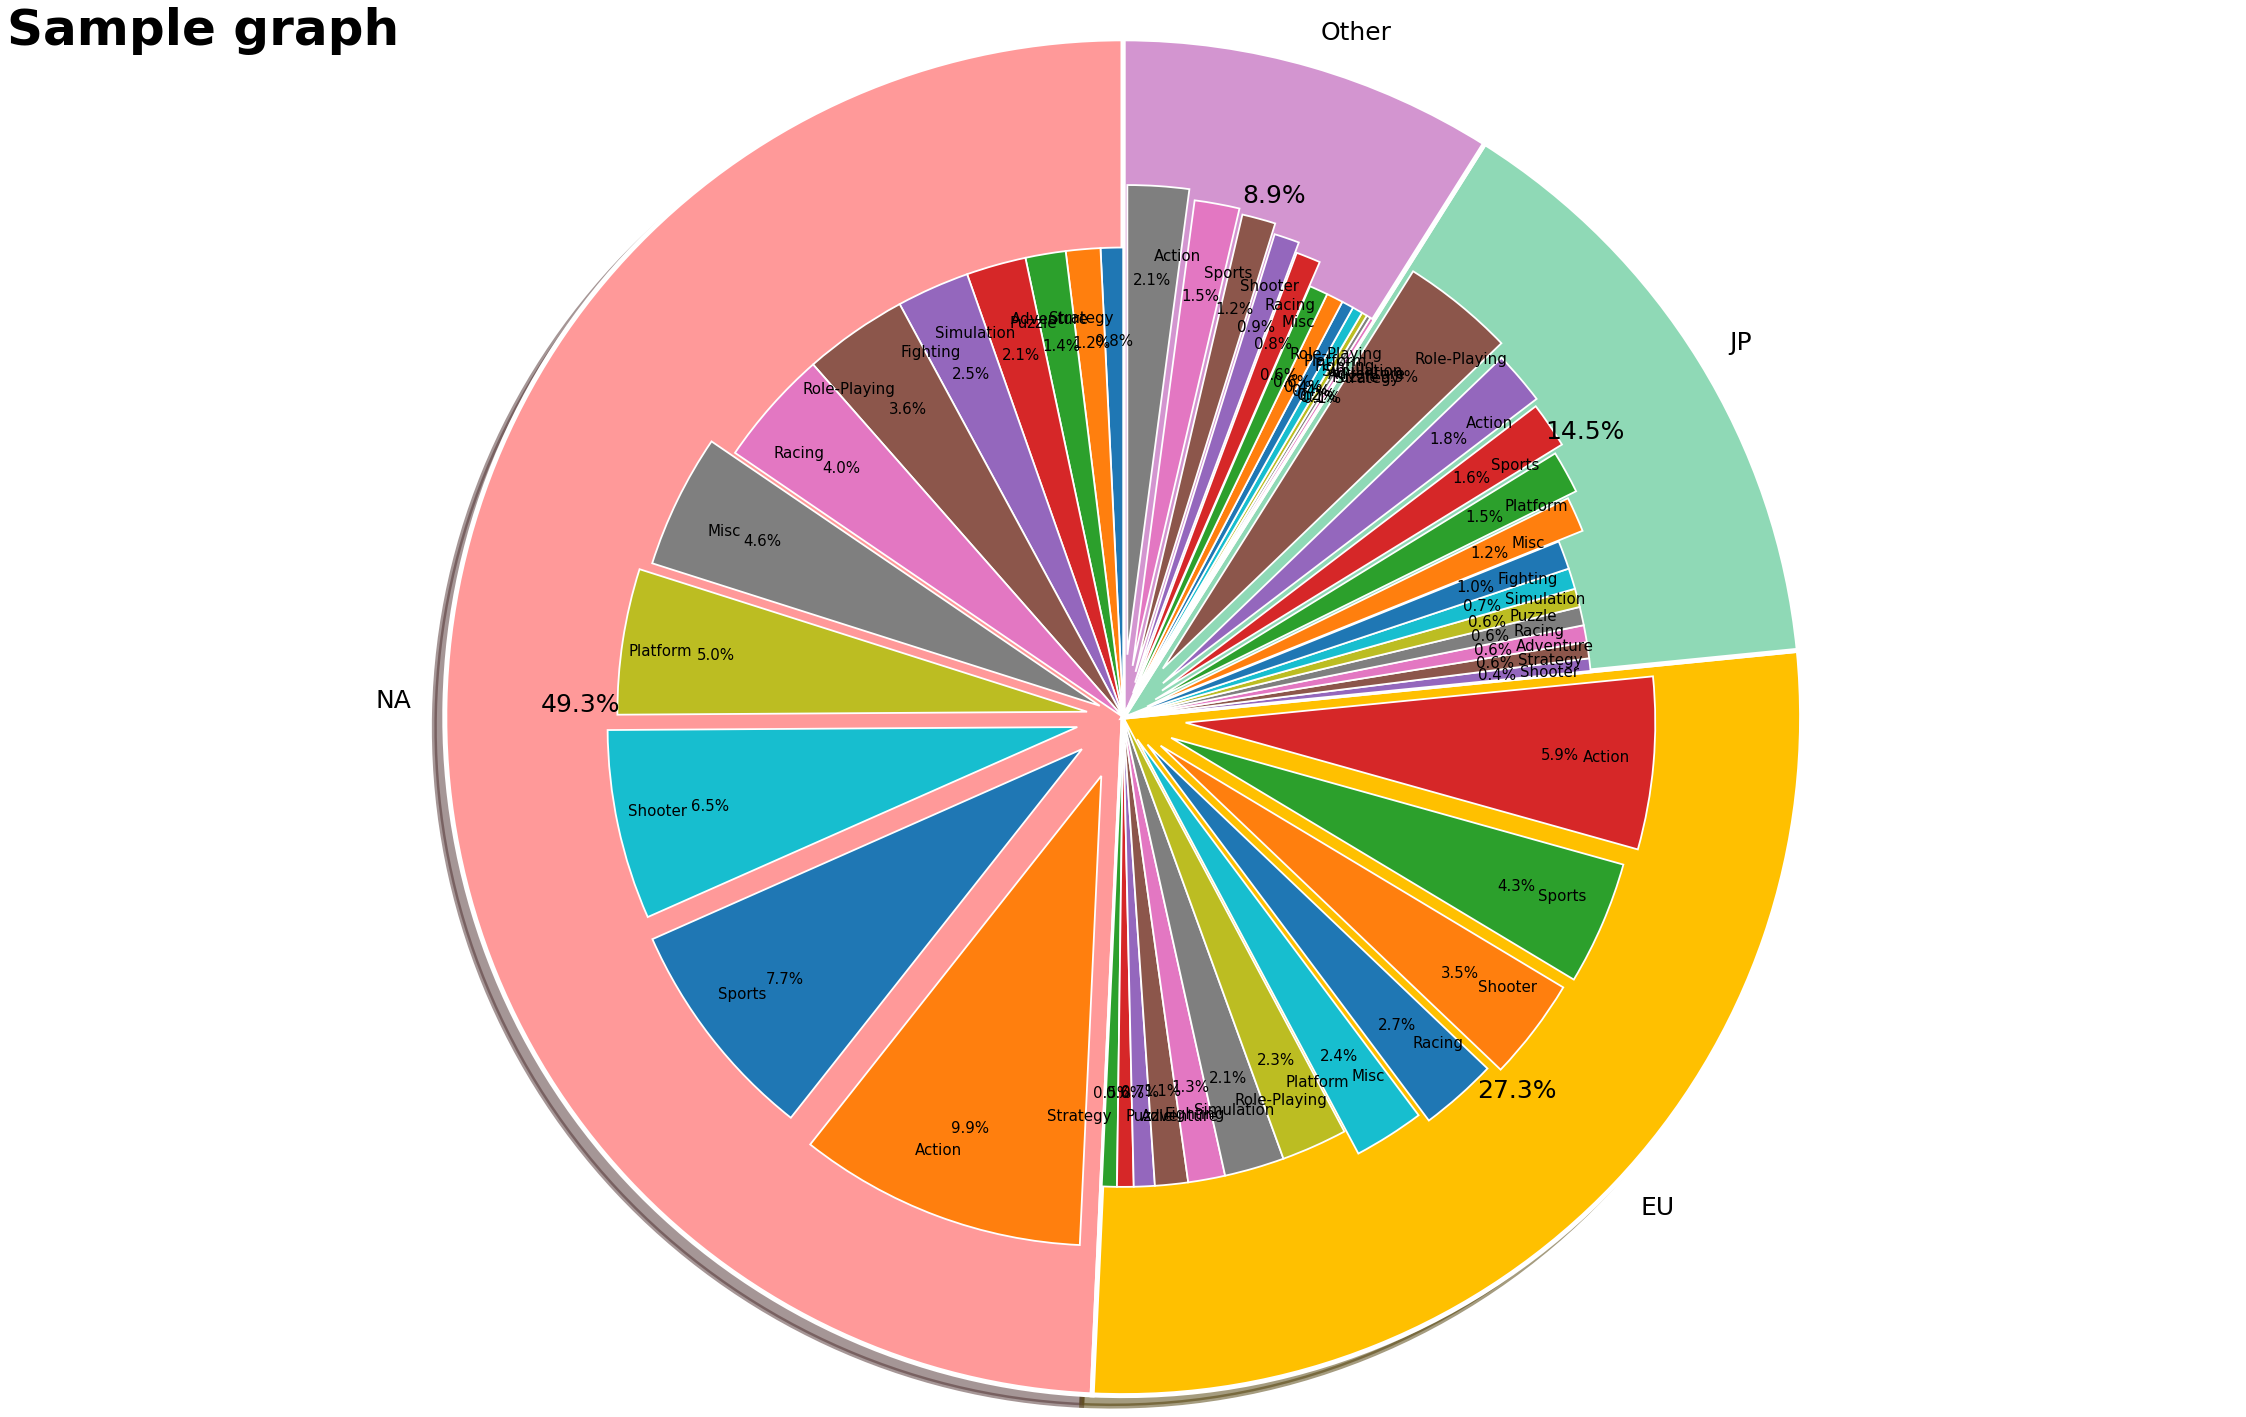

In [13]:
width_num = 0.4
explode = [0.1, 0.1, 0.05, 0.05]
explode2 = [0,0,0,0,0,0,0,0.05,0.07,0.09,0.1,0.12,
            0,0,0,0,0,0,0,0.05,0.07,0.09,0.1,0.12,
            0,0,0,0,0,0,0,0.05,0.07,0.09,0.1,0.12,
            0,0,0,0,0,0,0,0.05,0.07,0.09,0.1,0.12]

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [40, 24]

fig,ax = plt.subplots()
ax.axis('equal')
pie_outside= ax.pie(sales_sum,
                    radius=1.3,
                    labels=sales_name,
                    labeldistance = 1.05,
                    autopct='%.1f%%',
                    pctdistance=0.8,
                    colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0'],
                    #counterclock=False,
                    shadow=True,
                    startangle=90,
                    textprops={'fontsize': 25},
                    wedgeprops={"edgecolor":"white",'linewidth': 5, 'antialiased': True})

pie_inside= ax.pie(sumsum,
         radius=(1.3 - width_num),
         labels = sumindex,
         labeldistance=0.85,
         autopct='%.1f%%',
         pctdistance=0.8,
         #counterclock=False,
         explode=explode2,
         startangle=90,
         wedgeprops={"edgecolor":"white",'linewidth': 1.8, 'antialiased': True},
         textprops={'fontsize': 15})

title_font = {
    'fontsize': 50,
    'fontweight': 'bold'
}
plt.title('Sample graph', fontdict=title_font, loc='left', pad=20)
plt.show()



In [14]:
df_a.pivot_table(['Genre'],['Year'],aggfunc=['sum'])
df1 = pd.pivot_table(df_a, index = 'Year', columns= 'Genre',values ='All_Sales', aggfunc= np.sum,fill_value=0)
df1 = df1.cumsum()



In [15]:
import matplotlib.animation as ani
df1.rename_axis(None, inplace=True)
df1.columns.name = None
df1

,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
1975,0.00,0.00,0.00,0.00,1.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1980,0.84,0.00,0.77,2.70,1.03,0.00,0.00,0.00,7.07,0.00,0.00,0.00
1981,15.63,0.00,0.77,2.70,7.95,2.25,0.48,0.00,17.09,0.44,0.78,0.00
1982,25.07,1.30,1.24,3.57,12.98,13.31,2.64,0.00,24.41,0.44,2.51,0.00
1983,27.93,1.70,1.24,5.71,19.91,14.09,2.64,0.00,24.90,0.44,5.71,0.00
1984,29.78,1.70,1.24,7.16,20.60,17.23,8.59,0.00,56.00,0.44,11.88,0.00
1985,33.30,1.70,2.29,7.16,63.77,20.44,8.59,0.00,57.00,0.48,13.84,0.00
1986,48.50,1.90,2.29,7.16,73.16,20.44,10.85,2.85,60.89,0.48,21.08,0.00
1987,49.61,6.28,7.71,7.16,74.90,20.44,10.85,7.50,61.58,0.48,24.79,0.00
1988,51.35,6.28,7.71,7.16,102.63,26.02,12.99,13.38,62.09,0.51,28.39,0.00


In [23]:
import pandas_alive
df1.plot_animated(filename='/content/gdrive/My Drive/line.gif')

Generating BarChartRace, plotting ['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle', 'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports', 'Strategy']


BarChartRace(df=          Action  Adventure  Fighting  ...  Simulation   Sports  Strategy
index                                  ...                               
1975.0     0.000       0.00     0.000  ...       0.000     0.00      0.00
1976.0     0.168       0.00     0.154  ...       0.000     0.00      0.00
1977.0     0.336       0.00     0.308  ...       0.000     0.00      0.00
1978.0     0.504       0.00     0.462  ...       0.000     0.00      0.00
1979.0     0.672       0.00     0.616  ...       0.000     0.00      0.00
...          ...        ...       ...  ...         ...      ...       ...
2017.6  1763.030     238.47   448.400  ...     391.258  1346.79    175.78
2018.2  1763.030     238.47   448.400  ...     391.316  1346.79    175.78
2018.8  1763.030     238.47   448.400  ...     391.374  1346.79    175.78
2019.4  1763.030     238.47   448.400  ...     391.432  1346.79    175.78
2020.0  1763.030     238.47   448.400  ...     391.490  1346.79    175.78

[196 rows x 12 column

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as ani

color = ['red', 'green', 'blue', 'orange','red', 'green', 'blue', 'orange','red', 'green', 'blue', 'orange']
fig = plt.figure()
plt.xticks(rotation=45, ha="right", rotation_mode="anchor") #rotate the x-axis values
plt.subplots_adjust(bottom = 0, top = 2) #ensuring the dates (on the x-axis) fit in the screen
plt.ylabel('No of Deaths')
plt.xlabel('Dates')
def buildmebarchart(i=int):
    plt.legend(df1.columns)
    p = plt.plot(df1[:i].index, df1[:i].values) #note it only returns the dataset, up to the point i
    for i in range(0,12):
        p[i].set_color(color[i]) #set the colour of each curve
animator = ani.FuncAnimation(fig, buildmebarchart, interval = 100)
plt.show()

In [30]:
df_a['All_Sales'] = df_a['All_Sales']*10

In [ ]:
df_a['All_Sales'].apply(toInt)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Germany,Italy,US,United Kingdom
2020-02-21,0,1,0,0
2020-02-22,0,2,0,0
2020-02-23,0,3,0,0
2020-02-24,0,7,0,0
2020-02-25,0,10,0,0
...,...,...,...,...
2021-05-26,88000,125622,591950,127748
2021-05-27,88192,125793,593288,127758
2021-05-28,88360,125919,593963,127768
2021-05-29,88413,126002,594306,127775
